# Projet : Analyse exploratoire du dataset Heart Attack

In [39]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt

## Chargement du jeu de données

In [40]:
heart_attack = pd.read_csv("Heart Attack Data Set.csv")
heart_attack

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
heart_attack.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Mise au propre des variables

In [43]:
cp_types = {0 : "nothing", 1 : "typical angina", 2 : "atypical angina", 3 : "non-anginal pain", 4 : "asymptomatic"}
cp_type_cat = pd.CategoricalDtype(["normal", "typical angina", "atypical angina", "non-anginal pain", "asymptomatic"], ordered=True)
cp_cat = pd.CategoricalDtype(heart_attack["cp"].unique(), ordered=True)
heart_attack["cp_type"] = heart_attack["cp"].apply(lambda val : cp_types[val])
heart_attack["cp"] = heart_attack["cp"].astype(cp_cat)
heart_attack["cp_type"] = heart_attack["cp_type"].astype(cp_type_cat)

restecg_types = {0 : "normal", 1 : "ST-T wave abnormality", 2 : "ventricular hypertrophy"}
restecg_cat = pd.CategoricalDtype(heart_attack["restecg"].unique(), ordered=True)
restecg_types_cat = pd.CategoricalDtype(["normal", "ST-T wave abnormality", "ventricular hypertrophy"], ordered=True)
heart_attack["restecg_type"] = heart_attack["restecg"].apply(lambda val : restecg_types[val])
heart_attack["restecg"] = heart_attack["restecg"].astype(restecg_cat)
heart_attack["restecg_type"] = heart_attack["restecg_type"].astype(restecg_types_cat)

heart_attack["exang_type"] = heart_attack["exang"].apply(lambda val : "Yes" if val == 1 else "No")
exang_cat = pd.CategoricalDtype(heart_attack["exang"].unique(), ordered = True)
heart_attack["exang"] = heart_attack["exang"].astype(exang_cat)

heart_attack["sexe"] = heart_attack["sex"].apply(lambda val : "Male" if val == 1 else "Female")
heart_attack["heart attack"] = heart_attack["target"].apply(lambda val : "Yes" if val == 1 else "No")


heart_attack.dtypes


age                int64
sex                int64
cp              category
trestbps           int64
chol               int64
fbs                int64
restecg         category
thalach            int64
exang           category
oldpeak          float64
slope              int64
ca                 int64
thal               int64
target             int64
cp_type         category
restecg_type    category
exang_type        object
sexe              object
heart attack      object
dtype: object

## Proportion de malades en fonction de l'âge et du sexe

[Text(0.5, 1.0, 'Age des patients étudiés'),
 Text(0, 0.5, 'Age'),
 Text(0.5, 0, 'Heart Attack')]

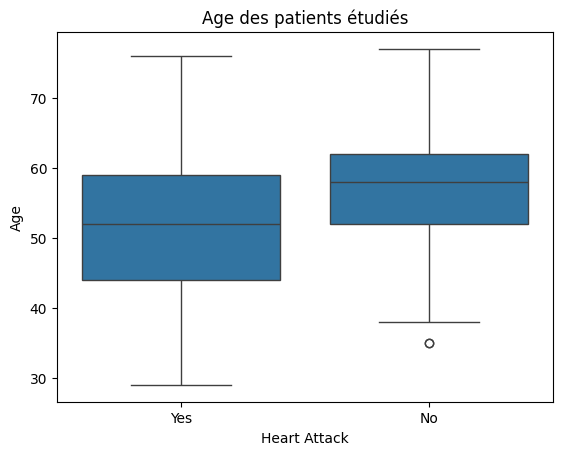

In [44]:
sn.boxplot(data = heart_attack, y = "age", x = "heart attack").set(title = "Age des patients étudiés", ylabel = "Age", xlabel = "Heart Attack")

[Text(0.5, 1.0, 'Age des patients étudiés'),
 Text(0, 0.5, 'Age'),
 Text(0.5, 0, 'Heart Attack')]

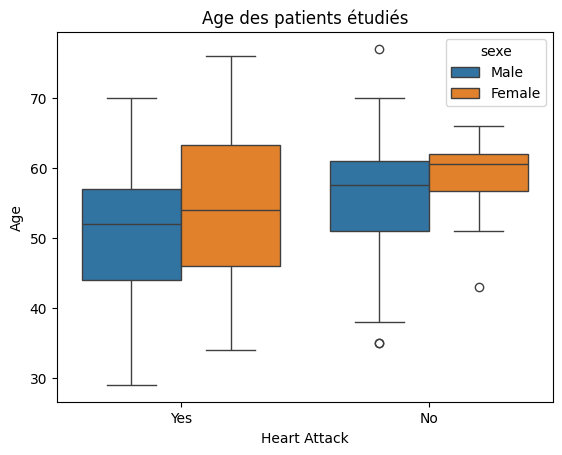

In [45]:
sn.boxplot(data = heart_attack, y = "age", x = "heart attack", hue="sexe").set(title = "Age des patients étudiés", ylabel = "Age", xlabel = "Heart Attack")

[Text(0.5, 1.0, 'Age des patients étudiés'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Nombre de patients')]

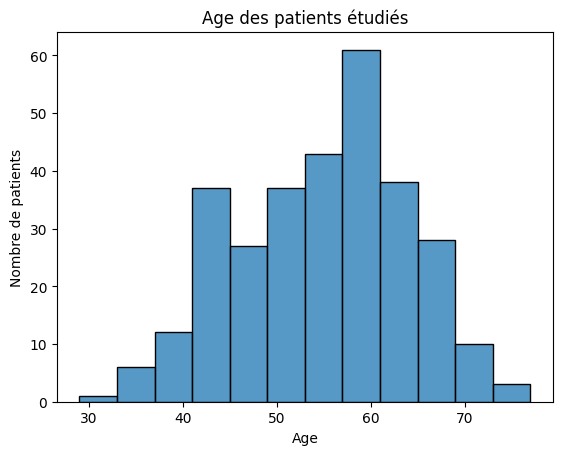

In [46]:
sn.histplot(data = heart_attack, x = "age").set(title = "Age des patients étudiés", xlabel = "Age", ylabel = "Nombre de patients")

[Text(0.5, 1.0, "Répartition de l'âge des patients"),
 Text(0, 0.5, 'Nombre de patients'),
 Text(0.5, 0, 'Age')]

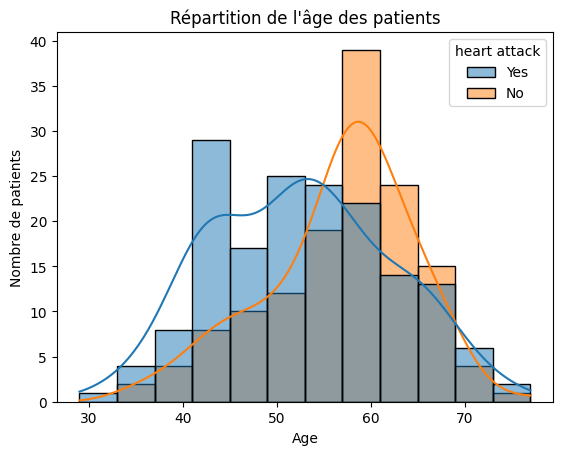

In [47]:
heart_attack_positive = heart_attack[heart_attack["target"] == 1]
heart_attack_negative = heart_attack[heart_attack["target"] == 0]

sn.histplot(data = heart_attack, x = "age", hue = "heart attack", kde = True).set(title = "Répartition de l'âge des patients", ylabel = "Nombre de patients", xlabel = "Age")

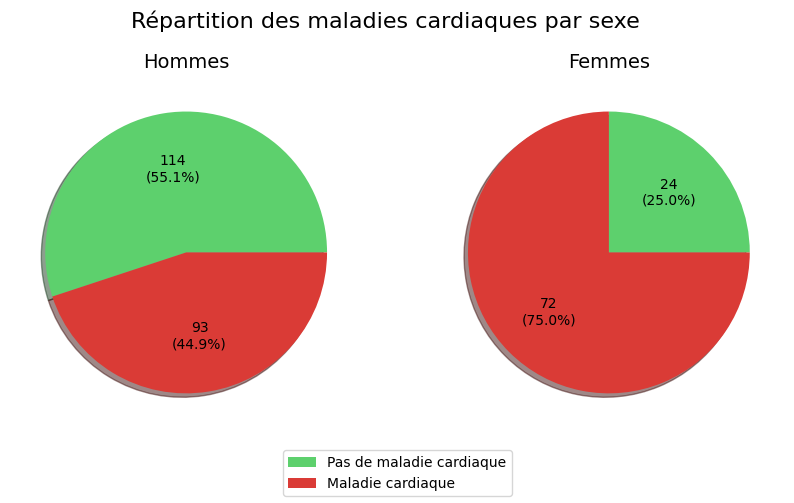

In [48]:
gender_heart_disease_counts = heart_attack.groupby('sex')['target'].value_counts().unstack()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

count_men = gender_heart_disease_counts.loc[1]
ax[0].pie(gender_heart_disease_counts.loc[1], autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(count_men) / 100, p), shadow=True, colors = ["#5DD06D", "#DA3B36"])
ax[0].set_title("Hommes", fontsize = 14)

count_women = gender_heart_disease_counts.loc[0]
ax[1].pie(gender_heart_disease_counts.loc[0], autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(count_women) / 100, p), shadow=True, colors = ["#5DD06D", "#DA3B36"])
ax[1].set_title('Femmes', fontsize = 14)
fig.legend(["Pas de maladie cardiaque", "Maladie cardiaque"], loc = "lower center")
fig.suptitle("Répartition des maladies cardiaques par sexe", fontsize = 16)

plt.show()

In [49]:
df = heart_attack[["sexe", "heart attack"]]
df = df.groupby(["sexe", "heart attack"]).size().unstack()
df

heart attack,No,Yes
sexe,,
Female,24,72
Male,114,93


In [50]:
heart_attack["sexe"].describe()

count      303
unique       2
top       Male
freq       207
Name: sexe, dtype: object

## Visualisation univariée

In [51]:
var_quant = ["age", "trestbps", "chol", "thalach", "oldpeak"]
var_quant_names = ["Age", "Tension artérielle", "Cholestérol", "Fréquence cardiaque maximale", "Dépression ST"]

var_qual = ["cp_type", "restecg_type", "exang_type", "slope", "ca", "thal", "fbs"]
var_qual_names = ["Type de douleur thoracique", "Résultat de l'électrocardiogramme au repos", "Angine induite par l'exercice", "Pente du segment ST à l'exercice", "Nombre de vaisseaux colorés par fluoroscopie", "Résultat du test de thallium", "Taux de sucre dans le sang à jeun"]

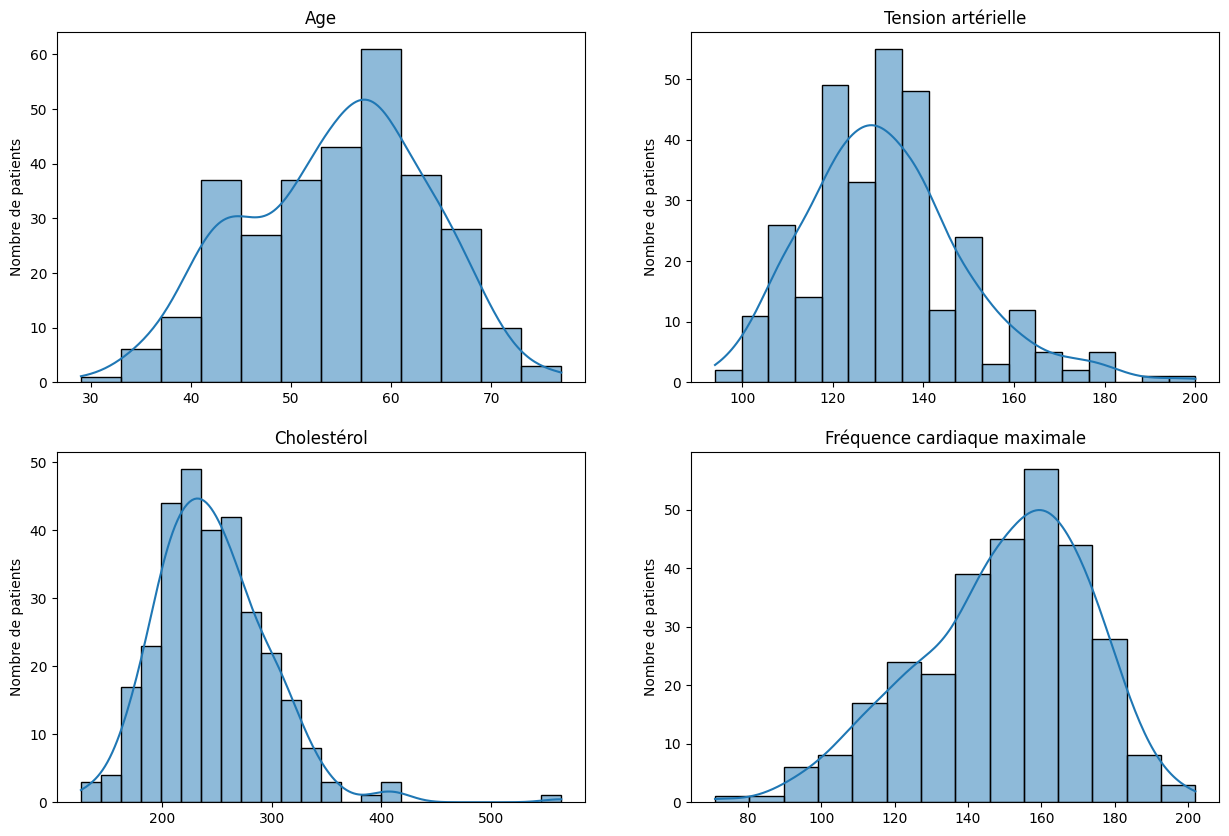

In [52]:
# visualisation des variables quantitatives

var_quant_graph = ["age", "trestbps", "chol", "thalach"]
var_quant_names = ["Age", "Tension artérielle", "Cholestérol", "Fréquence cardiaque maximale"]

# Histogramme des variables quantitatives
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
for i in range(4):
    sn.histplot(data = heart_attack, x = var_quant_graph[i], ax = ax[i//2, i%2], kde = True).set(title = var_quant_names[i], xlabel = "", ylabel = "Nombre de patients")
    ax[i//2, i%2].set_title(var_quant_names[i])
plt.show()


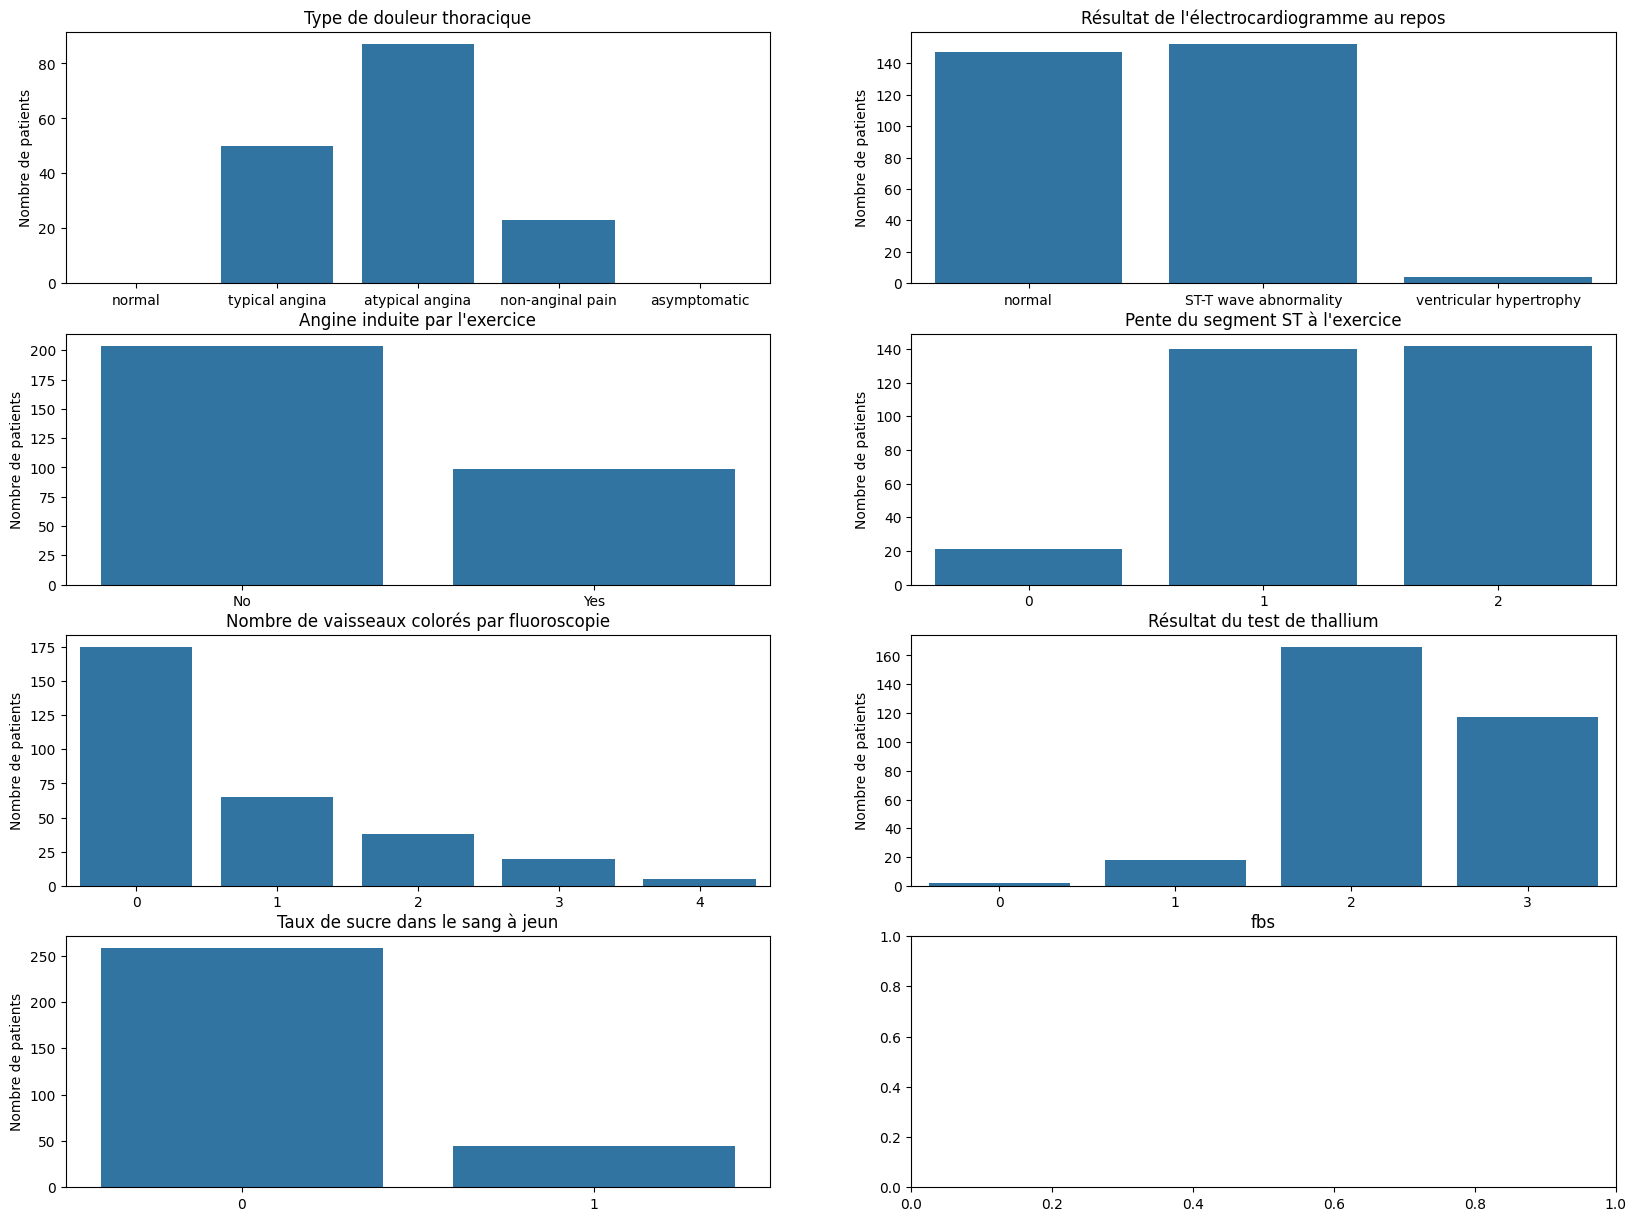

In [53]:
fig, axs = plt.subplots(4, 2, figsize = (20, 15))
for index, vars in enumerate(zip(var_qual, var_qual_names)):
    var, name = vars
    sn.countplot(data = heart_attack, x = var, ax = axs[index // 2][index % 2]).set(title = name, ylabel = "Nombre de patients", xlabel = "")
    plt.title(var)
plt.show()


## Analyse des variables quantitatives en fonction du sexe

<Axes: xlabel='Variable', ylabel='Valeur'>

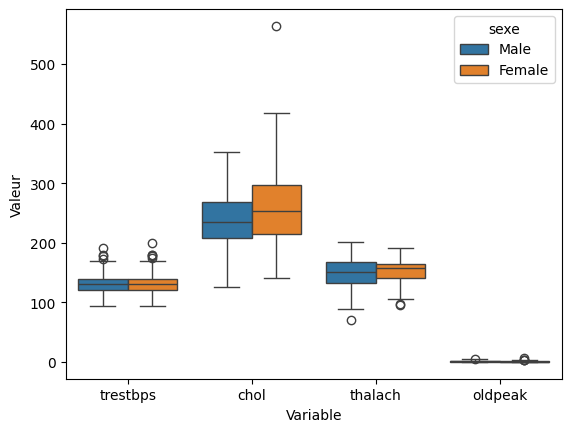

In [54]:
heart_attack_boxplot_df = heart_attack.melt(id_vars=["age", "sexe"], value_vars=["trestbps", "chol", "thalach", "oldpeak"], var_name="Variable", value_name="Valeur")
sn.boxplot(data = heart_attack_boxplot_df, y = "Valeur", x = "Variable", hue = "sexe")

## Analyse des variables quantitatives en fonction de la maladie

<Axes: xlabel='Variable', ylabel='Valeur'>

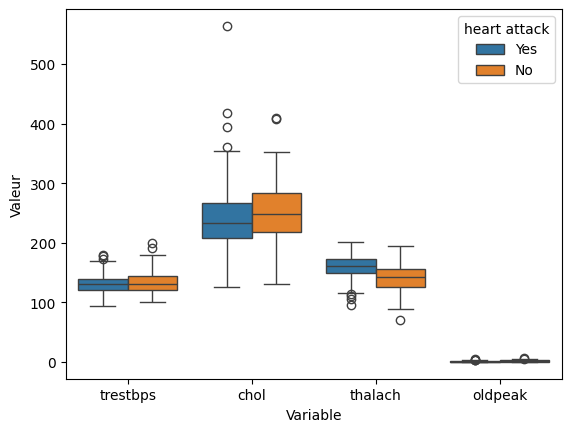

In [55]:
heart_attack_melted_df = heart_attack.melt(id_vars=["age", "sexe", "target", "heart attack"], value_vars=["trestbps", "chol", "thalach", "oldpeak"], var_name="Variable", value_name="Valeur")
sn.boxplot(data = heart_attack_melted_df, y = "Valeur", x = "Variable", hue = "heart attack")

## Etude des corrélations

<Axes: >

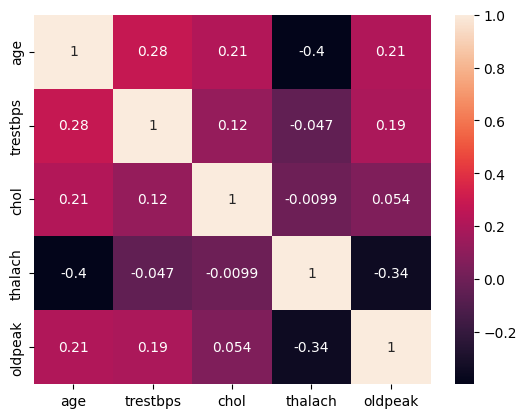

In [56]:
corr = heart_attack[["age", "trestbps", "chol", "thalach", "oldpeak"]].corr()
sn.heatmap(corr, annot=True)

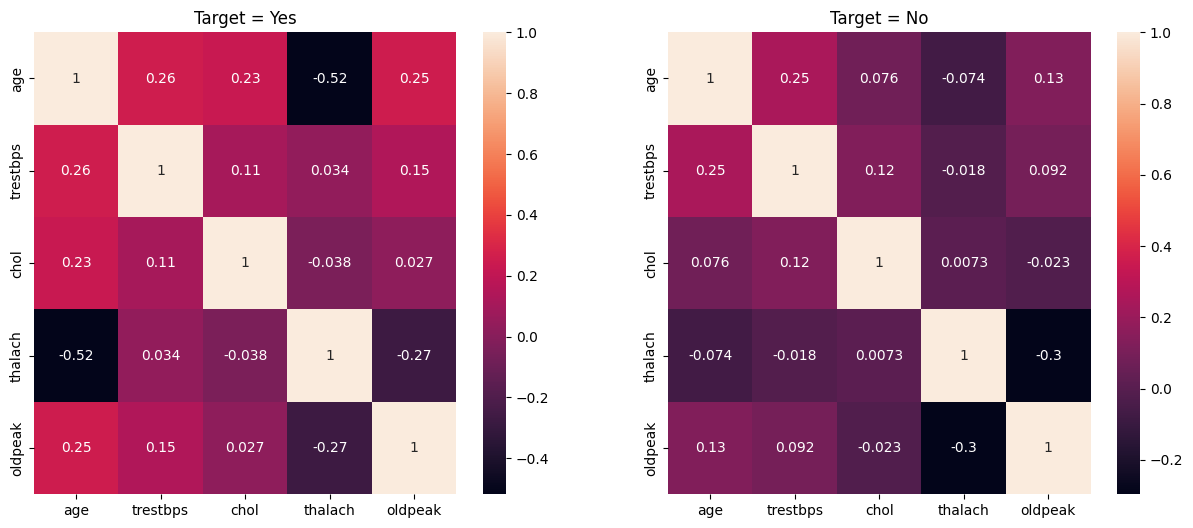

In [61]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
for i, target in enumerate(heart_attack["heart attack"].unique()):
    df = heart_attack[heart_attack["heart attack"] == target]
    corr = df[["age", "trestbps", "chol", "thalach", "oldpeak"]].corr(method = "spearman")
    sn.heatmap(corr, annot=True, ax = axs[i]).set(title = f"Target = Yes" if target == "Yes" else "Target = No")

## Etude visuelle des variables quantitatives

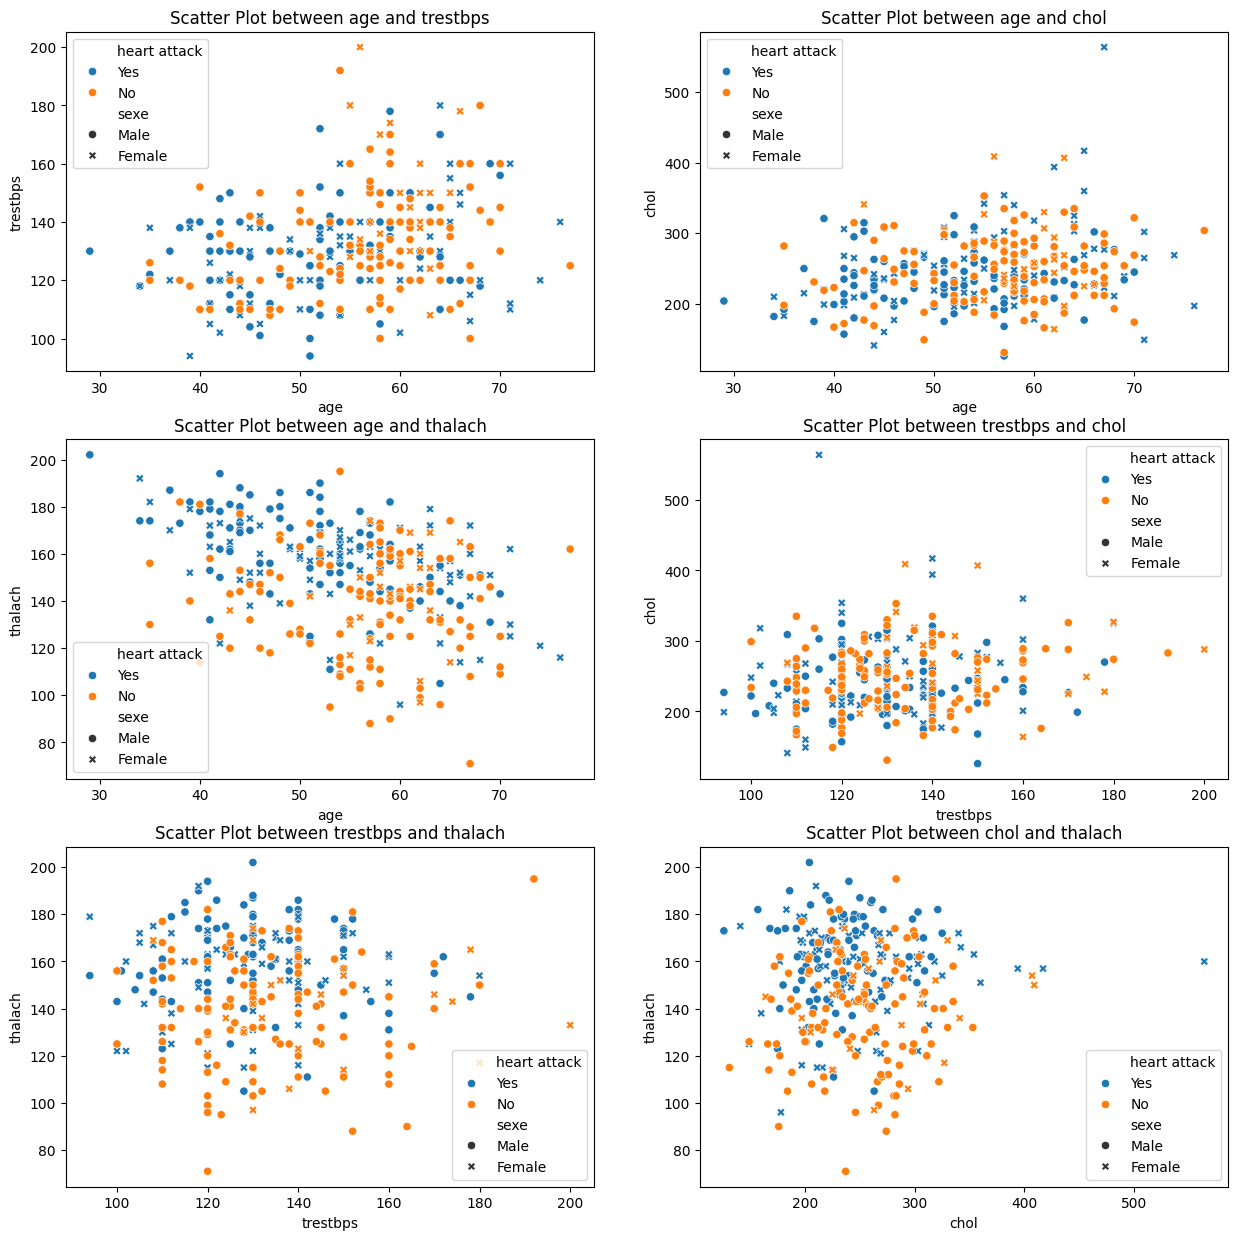

In [ ]:
df = heart_attack[["age", "trestbps", "chol", "thalach", "sexe", "heart attack"]]
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
quantitative_vars = df.columns[:-2]
plot_count = 0

for i, var1 in enumerate(quantitative_vars):
    for var2 in quantitative_vars[i+1:]:
        row = plot_count // 2 
        col = plot_count % 2 
        sn.scatterplot(data=df, x=var1, y=var2, hue="heart attack", style="sexe", ax=axs[row][col])
        axs[row][col].set_title(f'Scatter Plot between {var1} and {var2}')
        plot_count += 1

On remarque que chacune des variables semble indépendante les unes des autres, y compris si l'on considère en fonction du sexe ou si le patient a eu une crise cardiaque.

## Etude des variables qualitatives

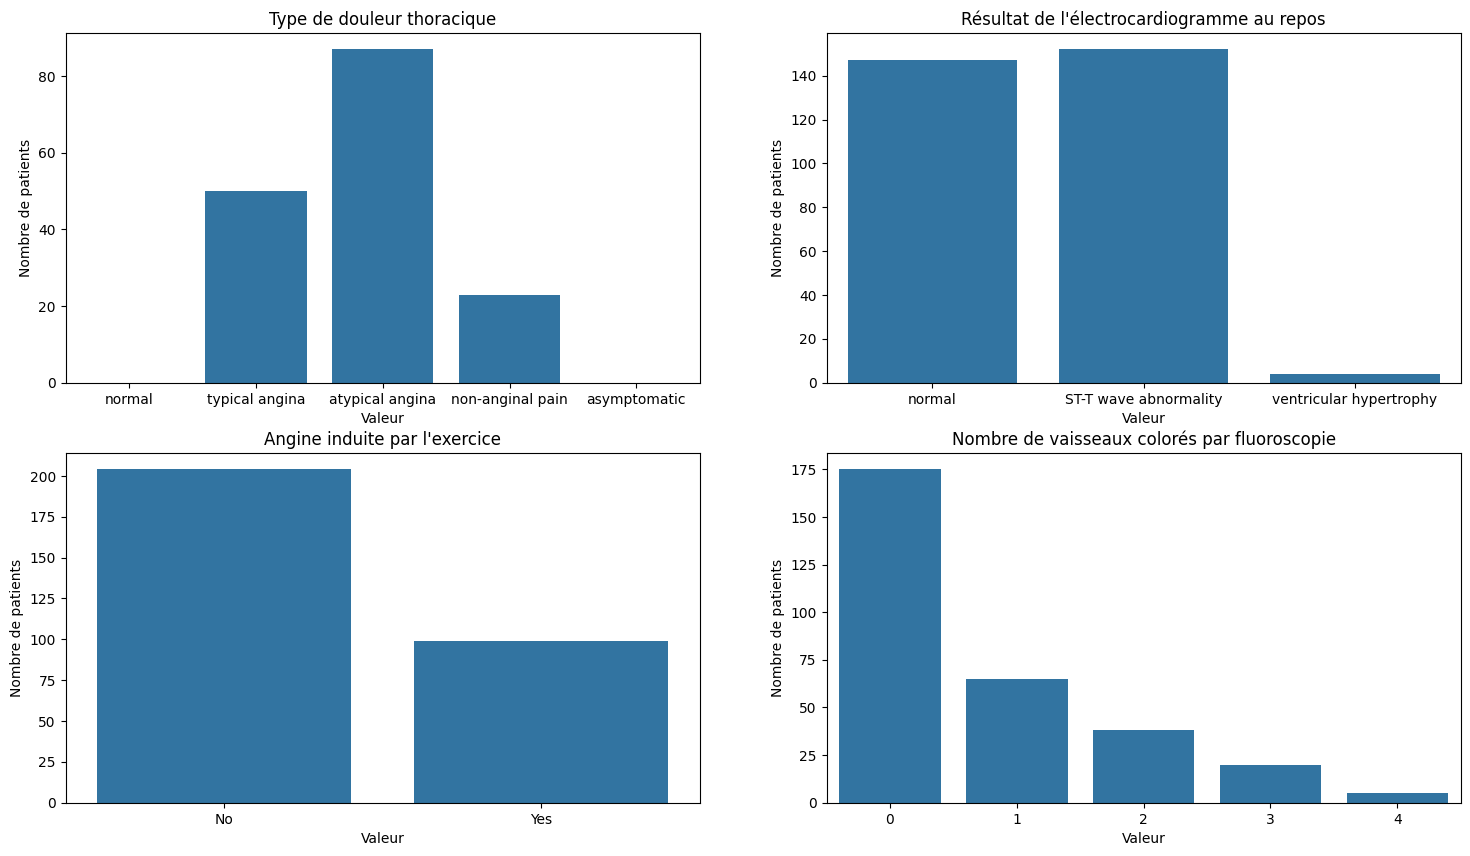

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18, 10))

for i, var in enumerate(zip(["cp_type", "restecg_type", "exang_type", "ca"], ["Type de douleur thoracique", "Résultat de l'électrocardiogramme au repos", "Angine induite par l'exercice", "Nombre de vaisseaux colorés par fluoroscopie"])):
    sn.countplot(data = heart_attack, x = var[0], ax = axs[i // 2][i % 2]).set(title = var[1],xlabel = "Valeur", ylabel = "Nombre de patients")

## Analyse en composantes principales (avec uniquement variables quantitatives)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X = heart_attack
X = X.drop(columns=["target", "heart attack", "cp_type", "restecg_type", "exang_type", "sexe", "slope", "ca", "thal", "cp", "restecg", "exang", "sex", "fbs"])

#X = pd.get_dummies(X)
nouvelle_rep = pca.fit_transform(X)


In [ ]:
# Trouver les axes factoriels

axes_factoriels = pca.components_
pd.DataFrame(axes_factoriels, columns=X.columns)

,age,trestbps,chol,thalach,oldpeak
0,0.039459,0.047587,0.998059,-0.007348,0.001330
1,0.182226,0.103840,-0.019375,-0.977402,0.017933
2,0.125470,0.982325,-0.050860,0.128933,0.009211
3,0.974413,-0.147878,-0.030246,0.166543,-0.000816
4,-0.003682,-0.011097,-0.000536,0.016489,0.999796


### Représentation des individus en 2 dimensions

[Text(0.5, 1.0, 'Analyse en composantes principales'),
 Text(0.5, 0, 'Composante 1'),
 Text(0, 0.5, 'Composante 2')]

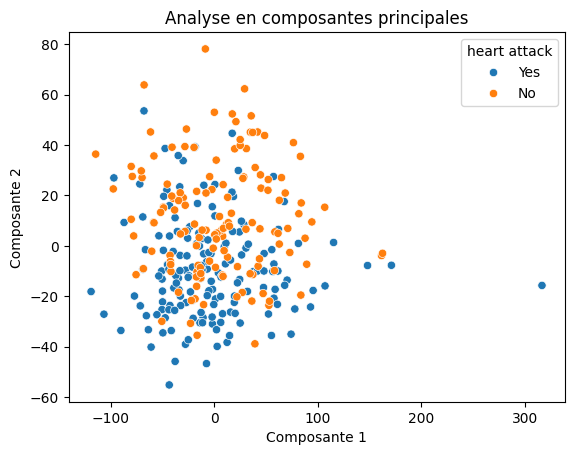

In [ ]:
sn.scatterplot(x = nouvelle_rep[:, 0], y = nouvelle_rep[:, 1], hue = heart_attack["heart attack"]).set(title = "Analyse en composantes principales", xlabel = "Composante 1", ylabel = "Composante 2")

### Méthode du coude pour connaître la variance expliquée

([<matplotlib.axis.XTick at 0x22dbade4d90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

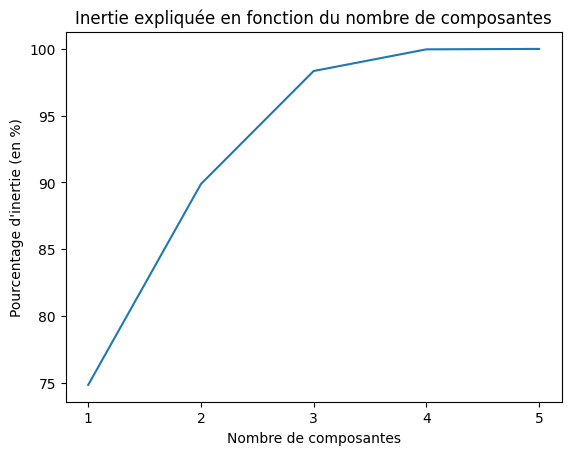

In [62]:
# Méthode du coude pour connaitre le nombre de composants

X = heart_attack
X = X.drop(columns=["target", "heart attack", "cp_type", "restecg_type", "exang_type", "sexe", "slope", "ca", "thal", "cp", "restecg", "exang", "sex", "fbs"])

inertie = []
for i in range(1, len(X.columns) + 1):
    pca = PCA(n_components=i)
    pca.fit(X)
    inertie.append(pca.explained_variance_ratio_.sum() * 100)

plt.plot(range(1, len(X.columns) + 1), inertie)
plt.xlabel("Nombre de composantes")
plt.ylabel("Pourcentage d'inertie (en %)")
plt.title("Inertie expliquée en fonction du nombre de composantes")
plt.xticks(range(1, len(X.columns) + 1))

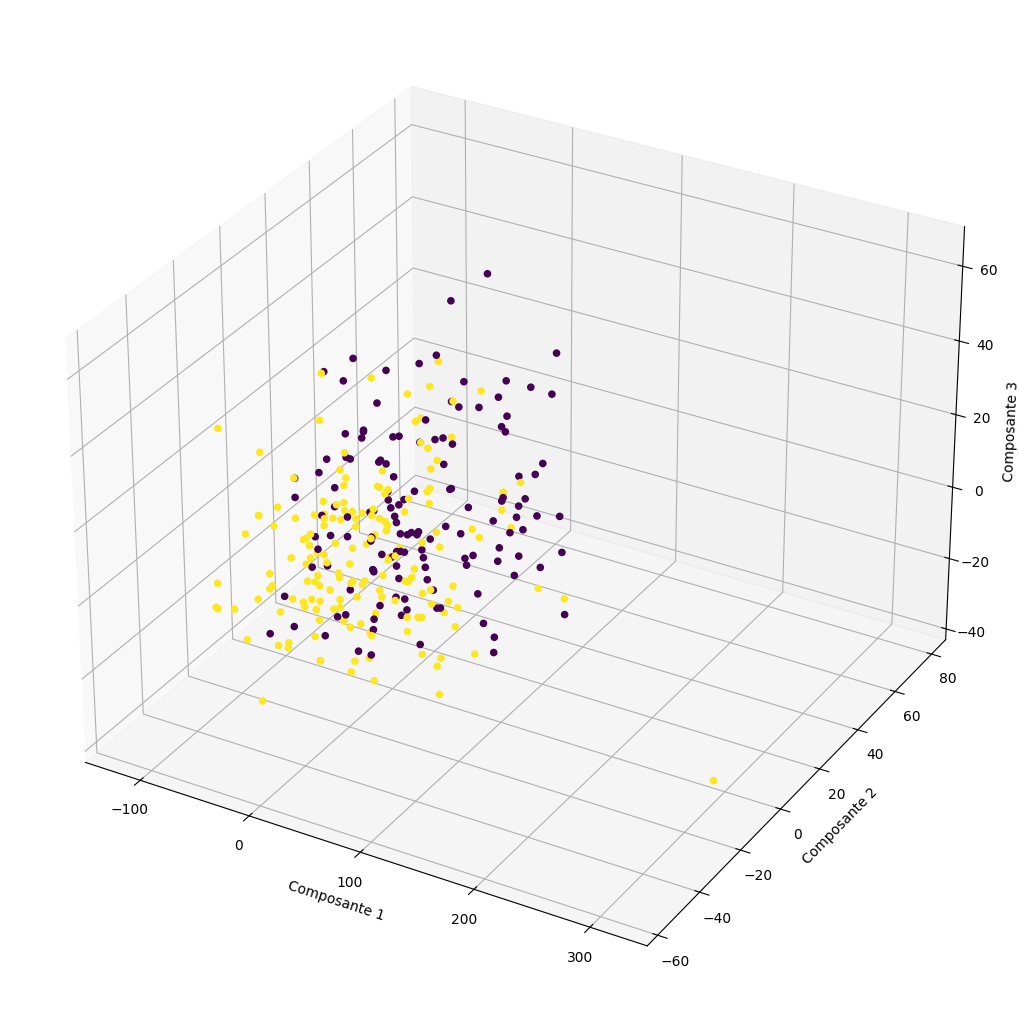

In [ ]:
pca = PCA(n_components=3)
nouvelle_rep = pca.fit_transform(X)

# Représentation 3D
from mpl_toolkits.mplot3d import Axes3D

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(nouvelle_rep[:, 0], nouvelle_rep[:, 1], nouvelle_rep[:, 2], c = heart_attack["target"], marker='o',alpha=1)
ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    default_kwargs = dict(leaf_font_size=10)
    default_kwargs.update(kwargs or {})

    dendrogram(linkage_matrix, **default_kwargs)

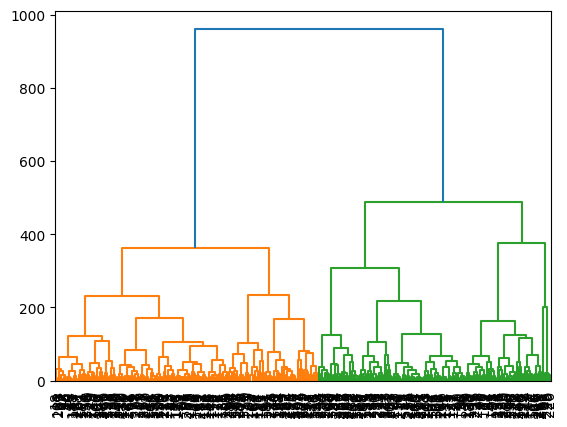

In [ ]:
# Clustering agglomerative

from sklearn.cluster import AgglomerativeClustering

X = heart_attack[["age", "trestbps", "chol", "thalach", "oldpeak"]]
clustering = AgglomerativeClustering(linkage="ward", metric="euclidean", distance_threshold=None, compute_distances=True, n_clusters=2).fit(X)
plot_dendrogram(clustering)


In [ ]:
nouvelle_rep_cluster = pd.DataFrame(nouvelle_rep)
nouvelle_rep_cluster["sex"] = heart_attack["sex"]
nouvelle_rep_cluster["target"] = heart_attack["target"]
nouvelle_rep_cluster["cluster"] = clustering.labels_

In [ ]:
from sklearn.metrics import rand_score

rand_score(nouvelle_rep_cluster["target"], nouvelle_rep_cluster["cluster"])

0.5066553012917185